In [41]:
import pandas as pd
from csv import writer
import json
import os
import re
import warnings
warnings.filterwarnings("ignore")

In [42]:
#Reading the data from txt file
with open('animals_data.txt', 'r') as f:
    j_animals = f.read()
animals_data = json.loads(j_animals)
animals_data
# © https://medium.com/swlh/web-scraping-all-the-links-with-python-fbefa0472753

[{'Name': 'Aardvark',
  'Kingdom': 'Animalia',
  'Phylum': 'Chordata',
  'Class': 'Mammalia',
  'Order': 'Tubulidentata',
  'Family': 'Orycteropodidae',
  'Genus': 'Orycteropus',
  'Scientific Name': 'Orycteropus afer',
  'Prey': 'Termites, Ants',
  'Name Of Young': 'Cub',
  'Group Behavior': 'Solitary',
  'Fun Fact': 'Can move up to 2ft of soil in just 15 seconds!',
  'Estimated Population Size': 'Unknown',
  'Biggest Threat': 'Habitat loss',
  'Most Distinctive Feature': 'Long, sticky tongue and rabbit-like ears',
  'Other Name(s)': 'Antbear, Earth Pig',
  'Gestation Period': '7 months',
  'Habitat': 'Sandy and clay soil',
  'Diet': 'Omnivore',
  'Average Litter Size': '1',
  'Lifestyle': 'Nocturnal',
  'Common Name': 'Aardvark',
  'Number Of Species': '18',
  'Location': 'Sub-Saharan Africa',
  'Slogan': 'Can move 2ft of soil in just 15 seconds!',
  'Group': 'Mammal',
  'Color': 'BrownGreyYellow',
  'Skin Type': 'Hair',
  'Top Speed': '25 mph',
  'Lifespan': '23 years',
  'Weight': 

# Conservation_status

<b>Extinct (EX)</b> – No known living individuals
Extinct in the wild (EW)</b> – Known only to survive in captivity, or as a naturalized population outside its historic range

<b>Critically Endangered (CR)</b> – Extremely high risk of extinct
ion in the wild

<b>Endangered (EN)</b> – Higher risk of extinction in the wild

<b>Vulnerable (VU)</b> – High risk of extinction in the wild

<b>Near Threatened (NT)</b> – Likely to become endangered in the near future

<b>Conservation Dependent (CD)</b> – Low risk; is conserved to prevent being near threatened, certain events may lead it to being a higher risk level

<b>Least concern (LC)</b> – Very Low risk; does not qualify for a higher risk category and not likely to be threatened in the near future. Widespread and abundant taxa are included in this category.

<b>Data deficient (DD)</b> – Not enough data to make an assessment of its risk of extinction

<b>Not evaluated (NE)</b> – Has not yet been evaluated against the criteria.

#credit https://en.wikipedia.org/wiki/Conservation_status

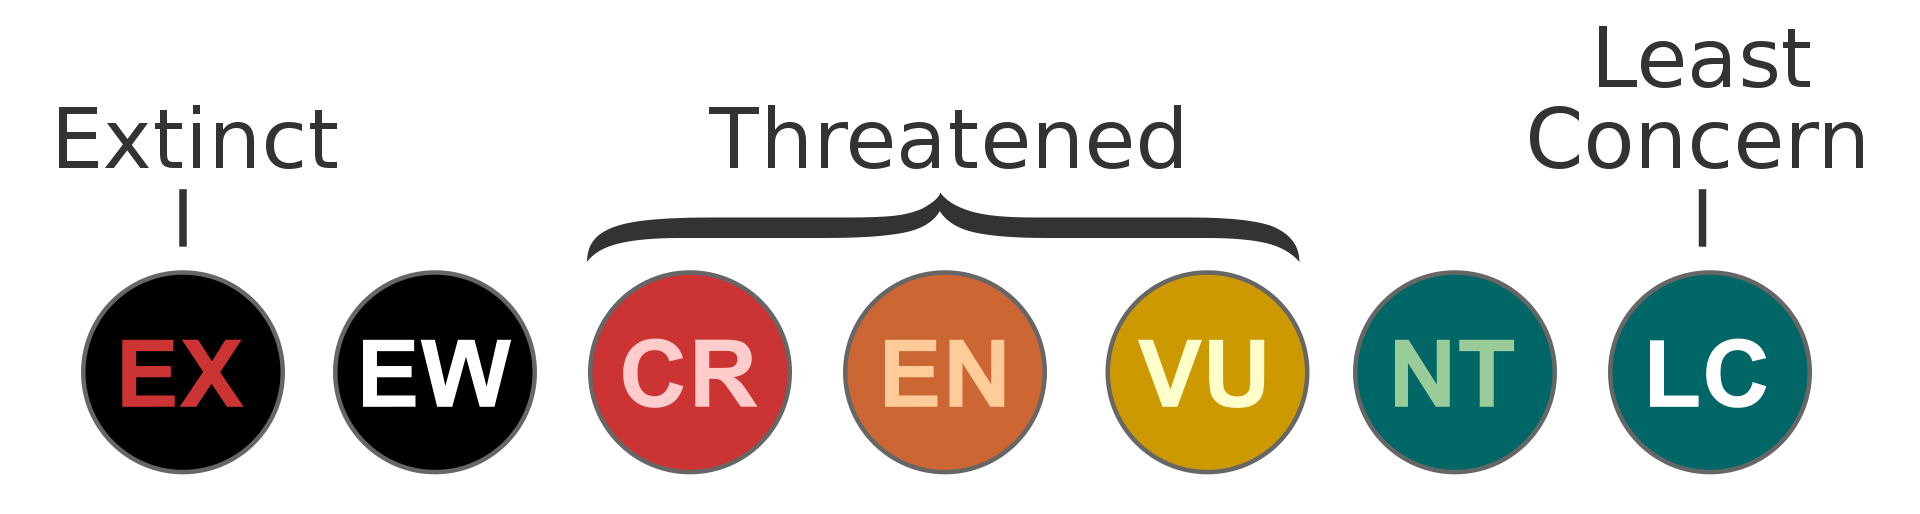

In [43]:
#Categorize the endangered animals:
endangered = ['Extinct', 'Critically Endangered', 'Endangered', 'Vulnerable','Conservation Dependent']
not_endangered = ['Least Concern' ,'Near Threatened']
unknown_endangered = ['Data Deficient', 'Not Evaluated', 'Not Listed', 'None']

In [44]:
name = []
class_animal = []
order = []
family = []
diet = []
top_speed = []
is_endangered = []
litter_size = []
lifespan = []
weight = []
length = []

#Continents
asia = []
europe = []
africa = []
south_america = []
north_america = []
central_america = []
antarctica = []
oceania = []
ocean = []
eurasia= []

In [45]:
for animal in animals_data:
    
    name.append(animal['Name'])
    try:
        class_animal.append(animal['Class']) 
    except:
        class_animal.append(None) 
    try:    
        order.append(animal['Order'])
    except:
        order.append(None)
    try:
        family.append(animal['Family'])
    except:
        family.append(None)
    
    try:
        diet.append(animal['Diet'])
    except:
        diet.append(None)
        
    #--------------Top Speed---------------------------
    
    try:
        if animal['Top Speed'] is not None:
            top_speed_str = animal['Top Speed'].replace(' mph', '')
            top_speed.append(top_speed_str)
        else:
            top_speed.append(None)
    except:
        top_speed.append(None)
        
    #---------------------Continents-------------------
    
    if 'Continents' in animal:
        if 'Asia' in animal['Continents']:
            asia.append(1)
        else:
            asia.append(0)
        
        if 'Europe' in animal['Continents']:
            europe.append(1)
        else:
            europe.append(0)
        
        if 'Africa' in animal['Continents']:
            africa.append(1)
        else:
            africa.append(0)  
        
        if 'South-America' in animal['Continents']:
            south_america.append(1)
        else:
            south_america.append(0)  
        
        if 'North-America' in animal['Continents']:
            north_america.append(1)
        else:
            north_america.append(0)     
        
        if 'Central-America' in animal['Continents']:
            central_america.append(1)
        else:
            central_america.append(0) 
        
        if 'Antarctica' in animal['Continents']:
            antarctica.append(1)
        else:
            antarctica.append(0)
        
        if 'Oceania' in animal['Continents']:
            oceania.append(1)
        else:
            oceania.append(0)  
        
        if 'Ocean' in animal['Continents']:
            ocean.append(1)
        else:
            ocean.append(0)   
        
        if 'Eurasia' in animal['Continents']:
            eurasia.append(1)
        else:
            eurasia.append(0)
    else: #if None = Appears in all Continents     
        asia.append(1)
        europe.append(1)
        africa.append(1)
        south_america.append(1)
        north_america.append(1)
        central_america.append(1)
        antarctica.append(1)
        oceania.append(1)
        ocean.append(1)
        eurasia.append(1)
        
    #------------------Endangered------------------------
    

    if 'Endangered' in animal:
        if animal['Endangered'] in endangered:
            is_endangered.append(1)
        elif animal['Endangered'] in not_endangered:
            is_endangered.append(0)
        elif animal['Endangered'] in unknown_endangered:
            is_endangered.append(None)
    else:
        is_endangered.append(None)
        
   #------------------Litter Size---------------------
    if 'Litter Size' in animal and animal['Litter Size'] is not None: 
        match_litter_size = re.search(r'\d+',animal['Litter Size']) #taking the number from the string
        if match_litter_size is not None:
            litter_size.append(match_litter_size.group())
        else:
            litter_size.append(None)
        
    elif 'Average Litter Size' in animal and animal['Average Litter Size'] is not None:
        match_litter_size = re.search(r'\d+',animal['Average Litter Size']) #taking the number from the string
        if match_litter_size is not None:
            litter_size.append(match_litter_size.group())
        else:
            litter_size.append(None)
    else:
        litter_size.append(None)
        
   #------------------Life Span (years)--------------------------
    #convert all days/month/weeks to years
    try:
        lifespan_str = animal['Lifespan']
        pattern = r'\d+\.?\d*' #gets the first and second number in a string
        minMax_num = re.findall(pattern, lifespan_str)
        if(len(minMax_num) >= 2): #checks if there is more than 1 number
            mean_value = (float(minMax_num[0]) + float(minMax_num[1]))/2 #makes average between two numbers
        else:
            mean_value = float(minMax_num[0])
            
        if 'year' not in lifespan_str:    
            if 'month' in lifespan_str:
                mean_value = mean_value/12
            elif 'day' in lifespan_str:
                mean_value = mean_value/365
            elif 'week' in lifespan_str:
                mean_value = mean_value/52
            
            
        lifespan.append(mean_value)        
    except:
        lifespan.append(None)    
    
    #---------------------Weight (kg)---------------------
    #convert all weight to kg
    
    try:
        weight_str = animal['Weight']
        pattern = r'\d+\.?\d*' #gets the first and second number in a string
        minMax_num = re.findall(pattern, weight_str)
        if(len(minMax_num) >= 2): #checks if there is more than 1 number
            mean_value = (float(minMax_num[0]) + float(minMax_num[1]))/2 #makes average between two numbers
        else:
            mean_value = float(minMax_num[0])
            
        if 'kg' not in weight_str:    
            if 'pound' in weight_str:
                mean_value = mean_value/2.20462
            elif 'gram' in weight_str:
                mean_value = mean_value*1000
            elif 'lb' in weight_str:
                mean_value = mean_value/2.2
            elif 'oz' in weight_str:
                mean_value = mean_value/28.35    
            elif 'ton' in weight_str:
                mean_value = mean_value/1000    
            elif 'mg' in weight_str:
                mean_value = mean_value/1000000  
            elif 'ounce' in weight_str:
                mean_value = mean_value/35.274  
                
        weight.append(mean_value)         
    except:
        weight.append(None)      
        
    #------------------Length (cm)-------------------
    #convert length to cm
    try:
        length_str = animal['Length']
        pattern = r'\d+\.?\d*' #gets the first and second number in a string
        minMax_num = re.findall(pattern, length_str)
        if(len(minMax_num) >= 2): #checks if there is more than 1 number
            mean_value = (float(minMax_num[0]) + float(minMax_num[1]))/2 #makes average between two numbers
        else:
            mean_value = float(minMax_num[0])
            
        if 'cm' not in length_str or 'centimeteres' not in length_str:    
            if 'm' in length_str or 'meter' in length_str:
                mean_value = mean_value*100
            elif 'inch' in length_str or 'in' in length_str:
                mean_value = mean_value*2.54
            elif 'mm' in length_str:
                mean_value = mean_value/100
            elif 'feet' in length_str or 'ft' in length_str:
                mean_value = mean_value*30.48
                           
        length.append(mean_value)        
    except:
        length.append(None)    

In [46]:
animals_dict = {"Animal Name": name,
                "Class": class_animal,
                "Order": order,
                "Family": family,
               "Top_Speed(mph)": top_speed,
                "Is_Endangered": is_endangered,
                "Litter_Size": litter_size,
                "Length(cm)": length,
                'Lifespan(years)': lifespan,
                "Weight(kg)": weight,
                "Diet": diet,
                "Asia": asia,
                "Europe": europe,
                "Africa": africa,
                "South-America": south_america,
                "North-America": north_america,
                "Central-America": central_america,
                "Antarctica": antarctica,
                "Oceania": oceania,
                "Ocean": ocean,
                "Eurasia": eurasia
}

In [47]:
df = pd.DataFrame(animals_dict)
df

,Animal Name,Class,Order,Family,Top_Speed(mph),Is_Endangered,Litter_Size,Length(cm),Lifespan(years),Weight(kg),...,Asia,Europe,Africa,South-America,North-America,Central-America,Antarctica,Oceania,Ocean,Eurasia
0,Aardvark,Mammalia,Tubulidentata,Orycteropodidae,25,0.0,1,162.500,23.0,70.000000,...,0,0,1,0,0,0,0,0,0,0
1,Aardwolf,Mammalia,Carnivora,Hyaenidae,None,0.0,2,93.980,15.0,10.909091,...,0,0,1,0,0,0,0,0,0,0
2,Abyssinian,Mammalia,Carnivora,Felidae,None,NaN,6,NaN,14.0,3.636364,...,0,0,1,0,0,0,0,0,0,0
3,Abyssinian Guinea Pig,Mammalia,Rodentia,Caviidae,4,0.0,5,NaN,10.0,NaN,...,0,0,0,1,0,0,0,0,0,0
4,Acadian Flycatcher,Aves,Passeriformes,Tyrannidae,None,0.0,None,14.478,3.0,0.012757,...,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,Zebu,Mammalia,Artiodactyla,Bovidae,25,0.0,1,NaN,14.0,175.000000,...,1,0,1,0,0,0,0,0,0,0
2454,Zokor,Mammalia,Rodentia,Spalacidae,None,0.0,None,NaN,NaN,0.354369,...,1,0,0,0,0,0,0,0,0,1
2455,Zonkey,Mammalia,Perissodactyla,Equidae,35,NaN,None,NaN,20.0,272.500000,...,0,0,1,0,0,0,0,0,0,0
2456,Zorse,Mammalia,Perissodactyla,Equidae,40,NaN,None,NaN,22.5,338.500000,...,0,0,1,0,1,0,0,0,0,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Animal Name      2454 non-null   object 
 1   Class            2357 non-null   object 
 2   Order            2370 non-null   object 
 3   Family           2337 non-null   object 
 4   Top_Speed(mph)   725 non-null    object 
 5   Is_Endangered    1588 non-null   float64
 6   Litter_Size      1066 non-null   object 
 7   Length(cm)       1381 non-null   float64
 8   Lifespan(years)  1854 non-null   float64
 9   Weight(kg)       1629 non-null   float64
 10  Diet             2417 non-null   object 
 11  Asia             2458 non-null   int64  
 12  Europe           2458 non-null   int64  
 13  Africa           2458 non-null   int64  
 14  South-America    2458 non-null   int64  
 15  North-America    2458 non-null   int64  
 16  Central-America  2458 non-null   int64  
 17  Antarctica    

In [49]:
df.drop(labels=['Top_Speed(mph)', 'Litter_Size'], axis=1, inplace=True)

In [50]:
df

,Animal Name,Class,Order,Family,Is_Endangered,Length(cm),Lifespan(years),Weight(kg),Diet,Asia,Europe,Africa,South-America,North-America,Central-America,Antarctica,Oceania,Ocean,Eurasia
0,Aardvark,Mammalia,Tubulidentata,Orycteropodidae,0.0,162.500,23.0,70.000000,Omnivore,0,0,1,0,0,0,0,0,0,0
1,Aardwolf,Mammalia,Carnivora,Hyaenidae,0.0,93.980,15.0,10.909091,Carnivore,0,0,1,0,0,0,0,0,0,0
2,Abyssinian,Mammalia,Carnivora,Felidae,NaN,NaN,14.0,3.636364,Omnivore,0,0,1,0,0,0,0,0,0,0
3,Abyssinian Guinea Pig,Mammalia,Rodentia,Caviidae,0.0,NaN,10.0,NaN,Omnivore,0,0,0,1,0,0,0,0,0,0
4,Acadian Flycatcher,Aves,Passeriformes,Tyrannidae,0.0,14.478,3.0,0.012757,Insectivore,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,Zebu,Mammalia,Artiodactyla,Bovidae,0.0,NaN,14.0,175.000000,Herbivore,1,0,1,0,0,0,0,0,0,0
2454,Zokor,Mammalia,Rodentia,Spalacidae,0.0,NaN,NaN,0.354369,Omnivore,1,0,0,0,0,0,0,0,0,1
2455,Zonkey,Mammalia,Perissodactyla,Equidae,NaN,NaN,20.0,272.500000,Herbivore,0,0,1,0,0,0,0,0,0,0
2456,Zorse,Mammalia,Perissodactyla,Equidae,NaN,NaN,22.5,338.500000,Herbivore,0,0,1,0,1,0,0,0,0,0


In [51]:
df.to_csv("Animals-First_Data.csv", index=False)